# <center> <u> Middle School Admission Prediction </u> </center>

For this project, I will be exploring a dataset provided by New York City Department of Education. Particularly, whether characteristics of NYC middle schools predict admission to one of 8 highly selective public high schools (Stuyvesant, Bronx High School of Science, etc.) in New York (from now on called HSPHS). Admission to these schools is contingent on applying AND scoring sufficiently highly on the Specialized High Schools Admissions Test (SHSAT), an independently produced and anonymously graded standardized test.

Load dataset...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import linear_model

df = pd.read_csv('middleSchoolData.csv')

df.shape

(594, 24)

In [2]:
#what is corr btw number of apps & admissions to HSPHS

d1 = df.iloc[:,2]
d2 = df.iloc[:,3]

corr,y = pearsonr(d1,d2)
print(corr,y)

0.8017265370719306 1.9292582453093973e-134


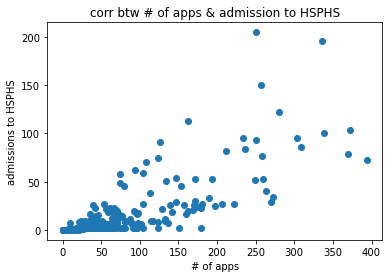

In [3]:
plt.scatter(d1,d2)
plt.title("corr btw # of apps & admission to HSPHS")
plt.xlabel('# of apps')
plt.ylabel('admissions to HSPHS')

plt.show()

In [19]:
#whats a better predictor of admission to HSPHS?

df["Application rate"] = df["applications"] /df["school_size"]

df2 = df.dropna(subset=['Application rate'])

d1 = df2.iloc[:,24]

d2 = df2.iloc[:,3]
d2 = d2.astype(float)

#print(d1,d2)
corr, y = pearsonr(d1,d2)
print(corr,y)

0.6587507529002675 6.141061848419574e-75


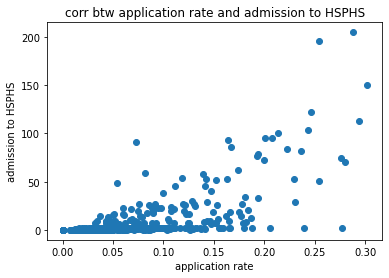

In [20]:
plt.scatter(d1,d2)
plt.title('corr btw application rate and admission to HSPHS')
plt.xlabel('application rate')
plt.ylabel('admission to HSPHS')
plt.show()

In [27]:
#which school has best per student odds of sending someone to HSPHS?

df["per_student_odds"] = df["acceptances"]/df["applications"]

df3 = df.dropna(subset=['applications'])

d1 = df.iloc[:,25]
school_name = df.iloc[:,1]

best = max(d1)

best_index = list(d1).index(best)
print(best_index)

print(df.loc[304,'school_name'])

304
THE CHRISTA MCAULIFFE SCHOOL\I.S. 187


In [31]:
#is there a relationship btw how students perceive their school & how the school performs on objective measures of achievement

from sklearn.decomposition import PCA
from scipy import stats

df_4 = df[df.columns[11:24]]

df4 = df_4.dropna()

df4.head()

,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
0,2.04,2.40,2.30,2.45,3.33,2.32,36.6,97.6,7.5,333.0,2.70,0.33,0.26
1,3.41,3.25,2.50,4.11,3.12,3.26,31.0,87.3,9.7,371.0,2.71,0.31,0.24
2,2.98,2.96,3.68,2.75,3.38,2.91,16.5,67.5,15.1,684.0,4.28,0.68,0.74
3,3.87,4.25,3.79,4.99,4.99,4.99,29.1,91.5,15.9,433.0,4.54,0.28,0.24
5,2.84,4.02,3.39,3.95,3.54,4.16,44.3,87.7,5.4,203.0,2.51,0.27,0.18


In [33]:
#split data into climate & objective measures

climate = df4[df4.columns[1:6]]

measures = df4[df4.columns[10:14]]

In [35]:
from sklearn.preprocessing import StandardScaler

x1 = climate.values
x1 = StandardScaler().fit_transform(x1)

x2 = measures.values
x2 = StandardScaler().fit_transform(x2)

In [36]:
pca_climate = PCA(n_components=1)
pca_measures = PCA(n_components=1)

principalComponent_climate = pca_climate.fit_transform(x1)
principalComponent_measures = pca_climate.fit_transform(x2)


In [37]:
r = np.corrcoef(principalComponent_climate[:,0],principalComponent_measures[:,0])
print(r)

[[ 1.         -0.31308871]
 [-0.31308871  1.        ]]


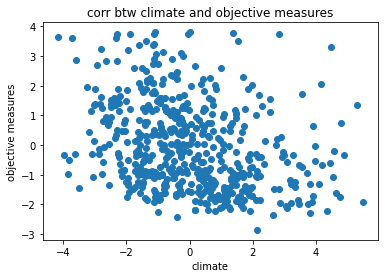

In [39]:
plt.scatter(principalComponent_climate[:,0], principalComponent_measures[:,0])
plt.title('corr btw climate and objective measures')
plt.xlabel('climate')
plt.ylabel('objective measures')
plt.show()

In [40]:
#test a hypothesis of your choice

import statistics

school_size = df.iloc[:,20]
school = df.iloc[:,1]

average_ss = statistics.median(school_size)
average_ss

588.5

In [41]:
#create var for small schools
conditions = [
    (df['school_size'] < average_ss),
    (df['school_size'] > average_ss),
    ]

values = ['small', 'large']

df['small/large'] = np.select(conditions,values)
df.head()

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,Application rate,per_student_odds,small/large
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0,24890.0,20.15,3.3,31.8,61.3,0.9,...,36.6,97.6,7.5,333.0,2.70,0.33,0.26,0.018018,0.000000,small
1,01M140,P.S. 140 NATHAN STRAUS,6,0,23536.0,24.56,5.7,12.4,78.7,0.5,...,31.0,87.3,9.7,371.0,2.71,0.31,0.24,0.016173,0.000000,small
2,01M184,P.S. 184M SHUANG WEN,67,23,16206.0,29.69,69.4,3.7,13.5,6.1,...,16.5,67.5,15.1,684.0,4.28,0.68,0.74,0.097953,0.343284,large
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0,21960.0,24.09,1.8,29.3,66.1,0.0,...,29.1,91.5,15.9,433.0,4.54,0.28,0.24,0.000000,NaN,small
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0,25444.0,15.80,3.8,32.1,54.7,3.8,...,42.5,82.1,2.8,106.0,NaN,0.33,0.20,0.103774,0.000000,small


In [42]:
df_two = df[pd.notnull(df['per_student_odds'])]

small = df_two[df_two['small/large']=='small']
large = df_two[df_two['small/large']=='large']

In [43]:
#ttest

from scipy.stats import ttest_ind

ttest_ind(small['per_student_odds'], large['per_student_odds'])

Ttest_indResult(statistic=-3.6196195817374166, pvalue=0.0003231678314273428)

In [44]:
#is there any evidence that the avail of material resources impacts obj measures of achievement or admission to HSPHS?

df6 = df.dropna(subset=['acceptances', 'per_pupil_spending', 'student_achievement'
                       , 'reading_scores_exceed', 'math_scores_exceed'])

material_resources = df6['per_pupil_spending']
admission = df6['acceptances']

df6.head()

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,Application rate,per_student_odds,small/large
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0,24890.0,20.15,3.3,31.8,61.3,0.9,...,36.6,97.6,7.5,333.0,2.70,0.33,0.26,0.018018,0.000000,small
1,01M140,P.S. 140 NATHAN STRAUS,6,0,23536.0,24.56,5.7,12.4,78.7,0.5,...,31.0,87.3,9.7,371.0,2.71,0.31,0.24,0.016173,0.000000,small
2,01M184,P.S. 184M SHUANG WEN,67,23,16206.0,29.69,69.4,3.7,13.5,6.1,...,16.5,67.5,15.1,684.0,4.28,0.68,0.74,0.097953,0.343284,large
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0,21960.0,24.09,1.8,29.3,66.1,0.0,...,29.1,91.5,15.9,433.0,4.54,0.28,0.24,0.000000,NaN,small
5,01M332,UNIVERSITY NEIGHBORHOOD MIDDLE SCHOOL,13,0,34000.0,12.50,8.9,23.2,63.1,1.0,...,44.3,87.7,5.4,203.0,2.51,0.27,0.18,0.064039,0.000000,small


In [45]:
corr,y = pearsonr(material_resources, admission)
print(corr,y)

-0.33697267345267434 1.1203397315915875e-13


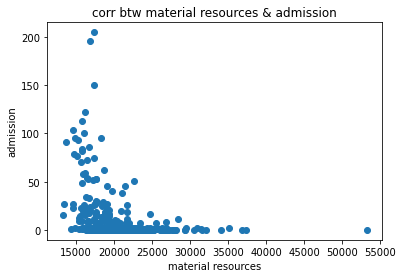

In [46]:
plt.scatter(material_resources, admission)
plt.title('corr btw material resources & admission')
plt.xlabel('material resources')
plt.ylabel('admission')
plt.show()

In [48]:
#undergo PCA to get objective value variable

obj_measures = df6[df6.columns[21:24]]

x3 = obj_measures.values

x3 = StandardScaler().fit_transform(x3)

pca_obj_measures = PCA(n_components=1)

pc_obj_measures = pca_obj_measures.fit_transform(x3)

In [49]:
corr, y = pearsonr(material_resources, pc_obj_measures[:,0])
print(corr,y)

-0.4633565389976959 7.331792723839646e-26


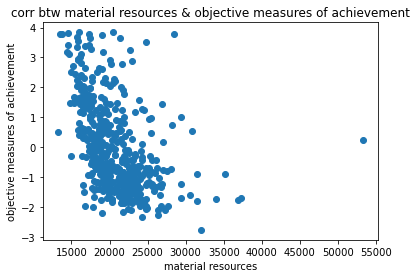

In [50]:
plt.scatter(material_resources, pc_obj_measures[:,0])
plt.title('corr btw material resources & objective measures of achievement')
plt.xlabel('material resources')
plt.ylabel('objective measures of achievement')
plt.show()

In [53]:
#what proportion of schools account for 90% of all students accepted to HSPHS?

accept = sum(df.iloc[:,3])

schools = len(df.iloc[:,1])

print(accept, schools)
ninety_percent = (4461/100) * 90
ninety_percent

4461 594


4014.9

In [54]:
df3 = df.sort_values(by='acceptances', ascending=False)
df3.head()

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,Application rate,per_student_odds,small/large
304,20K187,THE CHRISTA MCAULIFFE SCHOOL\I.S. 187,251,205,17403.0,27.71,67.5,1.3,6.8,0.6,...,11.3,65.8,3.3,873.0,4.36,0.90,0.90,0.287514,0.816733,large
324,21K239,MARK TWAIN I.S. 239 FOR THE GIFTED & TALENTED,336,196,16814.0,30.51,27.8,6.9,5.7,8.2,...,11.9,37.7,1.1,1322.0,4.16,0.88,0.88,0.254160,0.583333,large
33,03M054,J.H.S. 054 BOOKER T. WASHINGTON,257,150,17359.0,25.47,11.0,8.6,14.7,8.0,...,11.5,23.8,1.1,852.0,4.14,0.89,0.88,0.301643,0.583658,large
241,15K051,M.S. 51 WILLIAM ALEXANDER,280,122,16145.0,25.36,16.4,7.6,20.4,4.7,...,17.7,28.7,2.2,1136.0,4.05,0.83,0.83,0.246479,0.435714,large
22,02M312,NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...,163,113,15853.0,31.83,55.1,2.0,6.5,6.5,...,16.4,38.3,1.4,554.0,4.34,0.88,0.89,0.294224,0.693252,small


In [56]:
admission = df3['acceptances']
total = 0
prop_ninety = 0

for i in admission:
    if total < ninety_percent:
        total += i
        prop_ninety += 1
        
print(total)
print(prop_ninety)

4016
123


In [59]:
#calculate proportion
prop_ninety_calc = prop_ninety/schools
prop_ninety_calc

0.20707070707070707

In [61]:
prop_ninety = prop_ninety/schools

prop_ninety

0.20707070707070707

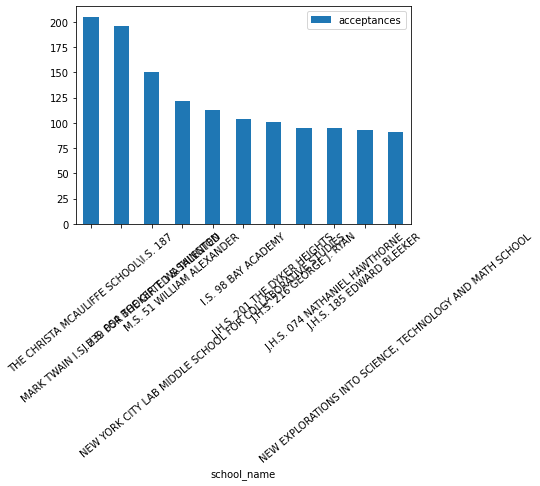

In [63]:
acceptances = df3[df.columns[1:4]]
acceptances = acceptances.drop(['applications'],axis=1)
acceptances = acceptances[acceptances['acceptances'] > 90]

acceptances.plot.bar(x = 'school_name' , y = ['acceptances'], rot=40)

In [64]:
#build a model of your choice that includes all factors
#as to what school characteristics are most important

df8 = df[df.columns[2:24]]

df8 = df8.dropna()

df8.head()

predictors = df8[df8.columns[0:]]
predictors_1 = predictors.drop(['acceptances'], axis=1)

target = df8.iloc[:,1]
df8.head()

,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,white_percent,rigorous_instruction,...,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
0,6,0,24890.0,20.15,3.3,31.8,61.3,0.9,2.7,2.04,...,2.45,3.33,2.32,36.6,97.6,7.5,333.0,2.70,0.33,0.26
1,6,0,23536.0,24.56,5.7,12.4,78.7,0.5,2.7,3.41,...,4.11,3.12,3.26,31.0,87.3,9.7,371.0,2.71,0.31,0.24
2,67,23,16206.0,29.69,69.4,3.7,13.5,6.1,7.3,2.98,...,2.75,3.38,2.91,16.5,67.5,15.1,684.0,4.28,0.68,0.74
3,0,0,21960.0,24.09,1.8,29.3,66.1,0.0,2.8,3.87,...,4.99,4.99,4.99,29.1,91.5,15.9,433.0,4.54,0.28,0.24
5,13,0,34000.0,12.50,8.9,23.2,63.1,1.0,3.9,2.84,...,3.95,3.54,4.16,44.3,87.7,5.4,203.0,2.51,0.27,0.18


In [66]:
#model for all factors

X = np.array(predictors_1.values)
Y = np.array(target.values)

regr = linear_model.LinearRegression()
regr.fit(X,Y)
r_sqr = regr.score(X,Y)
betas1 = regr.coef_
y_int = regr.intercept_

betas1

np.sort(betas1)

array([-7.81744031e+01, -1.86199707e+00, -1.41423780e+00, -8.82511528e-01,
       -1.36808824e-01, -1.09207464e-01, -7.45800372e-02, -2.08255364e-02,
       -1.66218115e-02, -1.52838935e-04,  3.16738729e-01,  4.26401681e-01,
        1.08569957e+00,  1.55657718e+00,  2.00169811e+00,  6.02623373e+00,
        6.04571197e+00,  6.05015905e+00,  6.10139825e+00,  6.55435734e+00,
        7.45666095e+01])

In [70]:
coeffs = pd.concat([pd.DataFrame(predictors_1.columns),
                   pd.DataFrame(np.transpose(betas1))], axis=1)

print(coeffs)

                               0          0
0                   applications   0.316739
1             per_pupil_spending  -0.000153
2                 avg_class_size  -0.020826
3                  asian_percent   6.101398
4                  black_percent   6.045712
5               hispanic_percent   6.050159
6               multiple_percent   6.554357
7                  white_percent   6.026234
8           rigorous_instruction  -1.414238
9         collaborative_teachers   1.556577
10        supportive_environment   1.085700
11   effective_school_leadership  -0.882512
12  strong_family_community_ties   2.001698
13                         trust  -1.861997
14            disability_percent  -0.109207
15               poverty_percent  -0.136809
16                   ESL_percent  -0.074580
17                   school_size  -0.016622
18           student_achievement   0.426402
19         reading_scores_exceed -78.174403
20            math_scores_exceed  74.566609


In [71]:
#second set of predictors

predictors_2 = df8[df8.columns[0:]]
predictors_2 = predictors_2.drop(['student_achievement', 'reading_scores_exceed',
                                 'math_scores_exceed'], axis=1)

In [73]:
#PCA variable for obj measures

obj_measures_2 = df8[df8.columns[19:22]]

x8 = obj_measures_2.values

x8 = StandardScaler().fit_transform(x8)

pca_obj_measures_2 = PCA(n_components=1)

pc_obj_measures_2 = pca_obj_measures_2.fit_transform(x8)

In [74]:
#model

X = np.array(predictors_2.values)
Y = pc_obj_measures_2

regr = linear_model.LinearRegression()
regr.fit(X,Y)
r_sqr = regr.score(X,Y)
betas2 = regr.coef_
y_int = regr.intercept_

np.sort(betas2)

array([[-1.17402380e-01, -3.54183443e-02, -2.16522068e-02,
        -2.05499929e-02, -1.68967694e-02, -1.05014751e-04,
         2.37502164e-06,  8.06589179e-04,  3.08508816e-03,
         1.26759696e-02,  2.85237862e-02,  3.16502804e-02,
         2.05524795e-01,  2.13833563e-01,  2.24736672e-01,
         2.26149182e-01,  2.28166181e-01,  2.30728261e-01,
         5.88713890e-01]])

In [75]:
predictors_2.head()

,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,white_percent,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size
0,6,0,24890.0,20.15,3.3,31.8,61.3,0.9,2.7,2.04,2.40,2.30,2.45,3.33,2.32,36.6,97.6,7.5,333.0
1,6,0,23536.0,24.56,5.7,12.4,78.7,0.5,2.7,3.41,3.25,2.50,4.11,3.12,3.26,31.0,87.3,9.7,371.0
2,67,23,16206.0,29.69,69.4,3.7,13.5,6.1,7.3,2.98,2.96,3.68,2.75,3.38,2.91,16.5,67.5,15.1,684.0
3,0,0,21960.0,24.09,1.8,29.3,66.1,0.0,2.8,3.87,4.25,3.79,4.99,4.99,4.99,29.1,91.5,15.9,433.0
5,13,0,34000.0,12.50,8.9,23.2,63.1,1.0,3.9,2.84,4.02,3.39,3.95,3.54,4.16,44.3,87.7,5.4,203.0


In [78]:
coeff2 = pd.concat([pd.DataFrame(predictors_2.columns),
                    pd.DataFrame(np.transpose(betas2))], axis = 1)

print(coeff2)

                               0         0
0                   applications  0.000807
1                    acceptances  0.003085
2             per_pupil_spending  0.000002
3                 avg_class_size  0.012676
4                  asian_percent  0.230728
5                  black_percent  0.205525
6               hispanic_percent  0.213834
7               multiple_percent  0.228166
8                  white_percent  0.224737
9           rigorous_instruction  0.226149
10        collaborative_teachers -0.020550
11        supportive_environment  0.588714
12   effective_school_leadership -0.117402
13  strong_family_community_ties  0.028524
14                         trust  0.031650
15            disability_percent -0.035418
16               poverty_percent -0.016897
17                   ESL_percent -0.021652
18                   school_size -0.000105
